# XGBoost model
A simple MLP contains only one hidden layer. We supply a data matrix to the input to have the same input as for the transformers. So we first need to flatten the matrix into a vector that can be run through the net.

This notebook presents the results achieved using the multi-step forecasting model.

In [1]:
import inference_helpers

import torch
from config import get_config

import numpy as np
from sklearn.metrics import mean_squared_error

In [18]:
from importlib import reload
reload(inference_helpers)

<module 'inference_helpers' from 'd:\\Uni_FJFI\\NMS3\\DP\\project_I\\System-Imbalance-Forecasting\\models\\xgboost\\inference_helpers.py'>

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
cfg = get_config()

Using device: cpu


We present summary statistics on validation data. To measure error, it was used RMSE, MAE and R2 score. The error is computed for every prediction separately.

In [ ]:
best_metrics, best_models_inds, data_dict = inference_helpers.get_best_model(cfg, './loss/runXY_exact')
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'XY_exact', best_models_inds)

In [9]:
# xgboost
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAE	R2
1	116.02	85.30	0.52
2	139.21	101.69	0.32
3	147.57	106.85	0.23
4	152.71	109.71	0.18
5	160.02	114.17	0.10
6	163.08	115.98	0.06
7	164.88	116.81	0.04
8	165.59	117.35	0.03


The visual results are shown in the following graphs. Plotted are the k best, worst and random predictions against the average RMSE over all prediction steps.

In [19]:
seq_data = inference_helpers.group_data(preds_gt)

rmse_data = np.empty(len(seq_data), dtype=np.float32)
for ind, dp in enumerate(seq_data):
    rmse_data[ind] = mean_squared_error(dp['true'], dp['pred'], squared=False)

# get k random, best and worst predictions
k = 3
min_loss_inds = np.argsort(rmse_data)[:k].tolist()
max_loss_inds = np.argsort(rmse_data)[-k:].tolist()
rand_inds = np.random.randint(0, len(rmse_data), size=k).tolist()

### Bad predictions

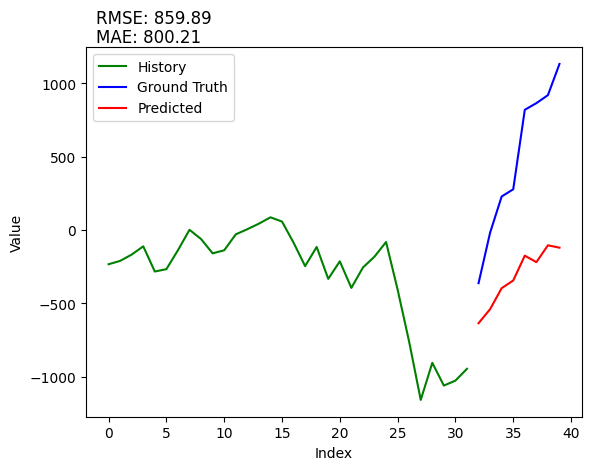

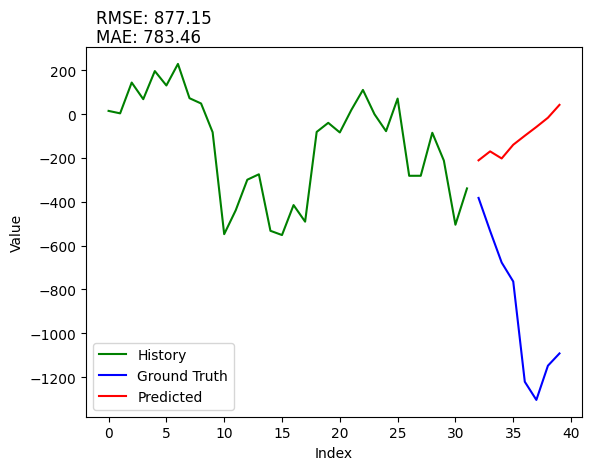

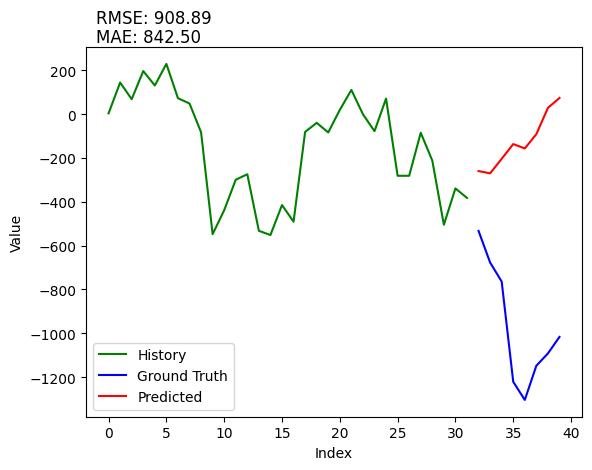

In [20]:
inference_helpers.plot_k_results(seq_data, max_loss_inds)

### Good predictions

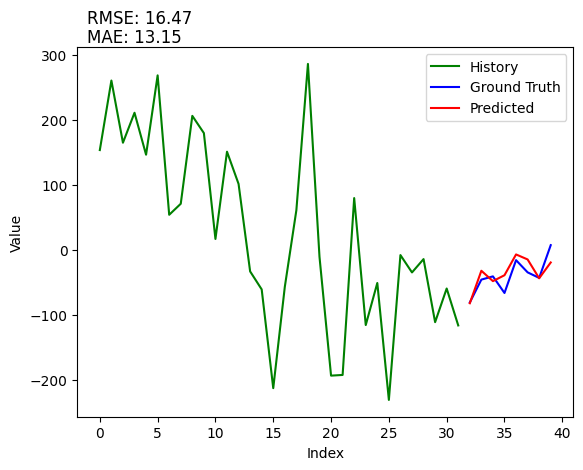

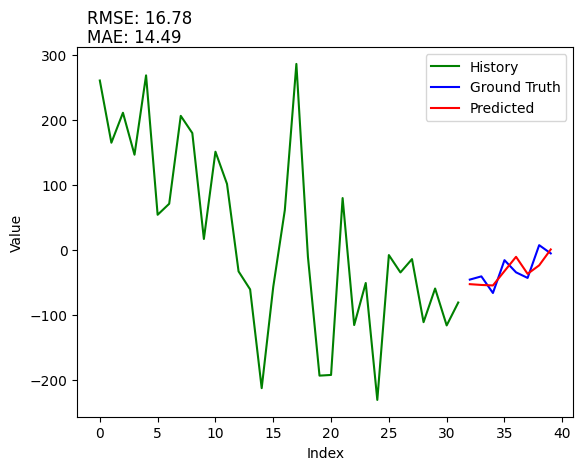

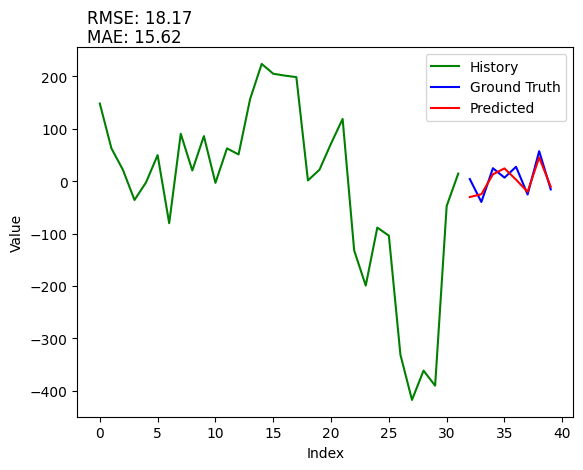

In [21]:
inference_helpers.plot_k_results(seq_data, min_loss_inds)

### Random predictions

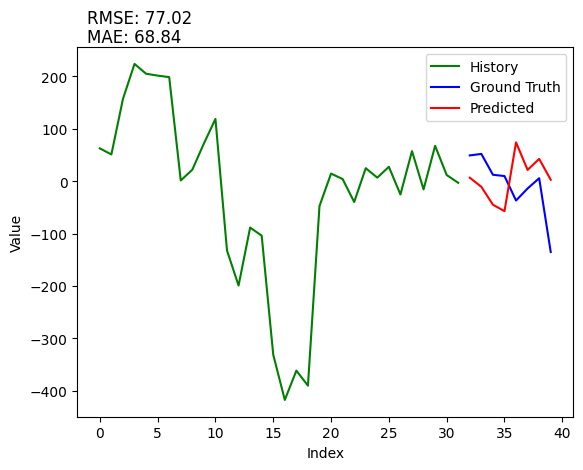

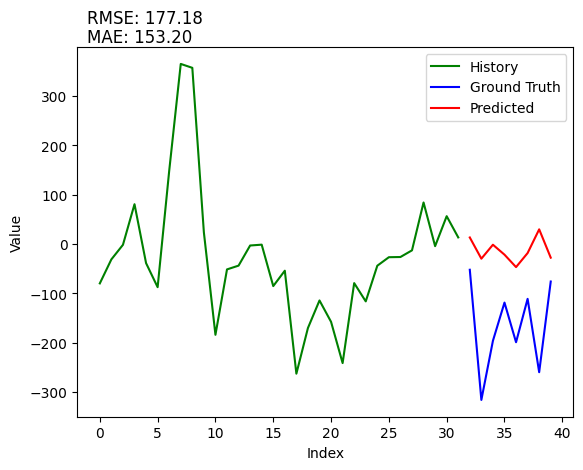

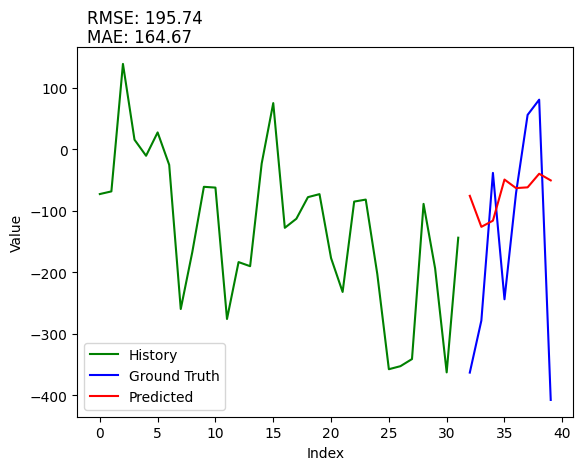

In [22]:
inference_helpers.plot_k_results(seq_data, rand_inds)

In [2]:
import os
import pickle
config = get_config()

with open(os.path.join(config["path_pickle"], config["data_pickle_name"]), 'rb') as file:
    ds_raw =  pickle.load(file)

In [89]:
df = ds_raw
lags_dict = {
    "system_imbalance": [4*24-2*4, 7*4*24-2*4]
}

In [90]:
import transformer_dataset
ds_lags, new_vars = transformer_dataset.create_lags(ds_raw, lags_dict, None)

In [91]:
new_vars

['system_imbalance_lag88', 'system_imbalance_lag664']

In [99]:
ds_lags.loc[3000:3000+32, ['system_imbalance', 'system_imbalance_lag88', 'system_imbalance_lag664', 'day', 'hour', 'quarter_hour']]

(33, 6)

In [98]:
ds_lags.loc[3000-7*4*24:3000-7*4*24+32+8, ['system_imbalance', 'system_imbalance_lag88', 'system_imbalance_lag664', 'day', 'hour', 'quarter_hour']]

,system_imbalance,system_imbalance_lag88,system_imbalance_lag664,day,hour,quarter_hour
2328,255.191,-397.873,-273.442,25,5,0
2329,211.918,-404.499,-148.572,25,5,1
2330,90.703,-389.529,-17.222,25,5,2
2331,-132.610,-471.020,-88.679,25,5,3
2332,24.694,-385.027,66.754,25,6,0
2333,-137.396,-405.296,145.232,25,6,1
2334,-163.519,-479.482,65.393,25,6,2
2335,-77.220,-195.038,82.947,25,6,3
2336,-197.992,-200.440,46.623,25,7,0
2337,-179.390,-112.196,97.782,25,7,1


In [73]:
ds_lags[250+32:250+32+8]

,system_imbalance,most_recent_forecast_load,day,hour,quarter_hour,system_imbalance_lag88
374,-251.494,10071.53,4,20,2,-49.416
375,13.637,9940.29,4,20,3,19.071
376,-115.623,10415.14,4,21,0,-32.753
377,3.905,10547.10,4,21,1,47.898
378,-24.738,10551.96,4,21,2,103.948
379,-193.970,10465.91,4,21,3,-77.830
380,-308.809,10246.05,4,22,0,-117.880
381,-292.095,10123.51,4,22,1,-130.982


In [28]:
ds_lags.head()

,system_imbalance,most_recent_forecast_load,hour_sin,hour_cos,system_imbalance_lag2
6,-38.410,7508.03,0.000000,1.000000,62.864
7,15.970,7353.13,0.000000,1.000000,54.215
8,33.283,7231.41,0.258819,0.965926,-38.410
9,99.540,7623.74,0.258819,0.965926,15.970
10,239.559,7567.78,0.258819,0.965926,33.283


In [ ]:
data = df.copy()
lags_data = 
if lags_dict:
    for variable_name, lag_values in lags_dict.items():
        for num_lag in lag_values:
            data[new_column_name] = data[variable_name].shift(num_lag)